<a href="https://colab.research.google.com/github/aureliodeboa/Restic-K-means/blob/main/Atividade2Restic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [50]:
import pandas as pd
import zipfile
from urllib.request import urlretrieve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Carregamento dos dados

In [52]:
# Download e extração do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
urlretrieve(url, "har_dataset.zip")

# Extração do arquivo
with zipfile.ZipFile("har_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("HAR_Dataset")

# Leitura dos dados de treino e teste
X_train = pd.read_csv('HAR_Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv('HAR_Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)

# Concatenando os dados
X = pd.concat([X_train, X_test], ignore_index=True)


In [ ]:
X.sample(5)

In [53]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [54]:
# Carregar os nomes das features
features = pd.read_csv('HAR_Dataset/UCI HAR Dataset/features.txt', sep='\s+', header=None, usecols=[1])

# Atribuir nomes às colunas
X.columns = features[1].values

X.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# Analise Exploratória

### Estrutura e estatísticas

In [ ]:
print(X.shape) #Verificando tamanho do dataset

(10299, 561)


In [ ]:
print(X.info()) #Verificando estrutura do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 44.1 MB
None


In [ ]:
# Estatísticas descritivas
print(X.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   


### Analisar correlação

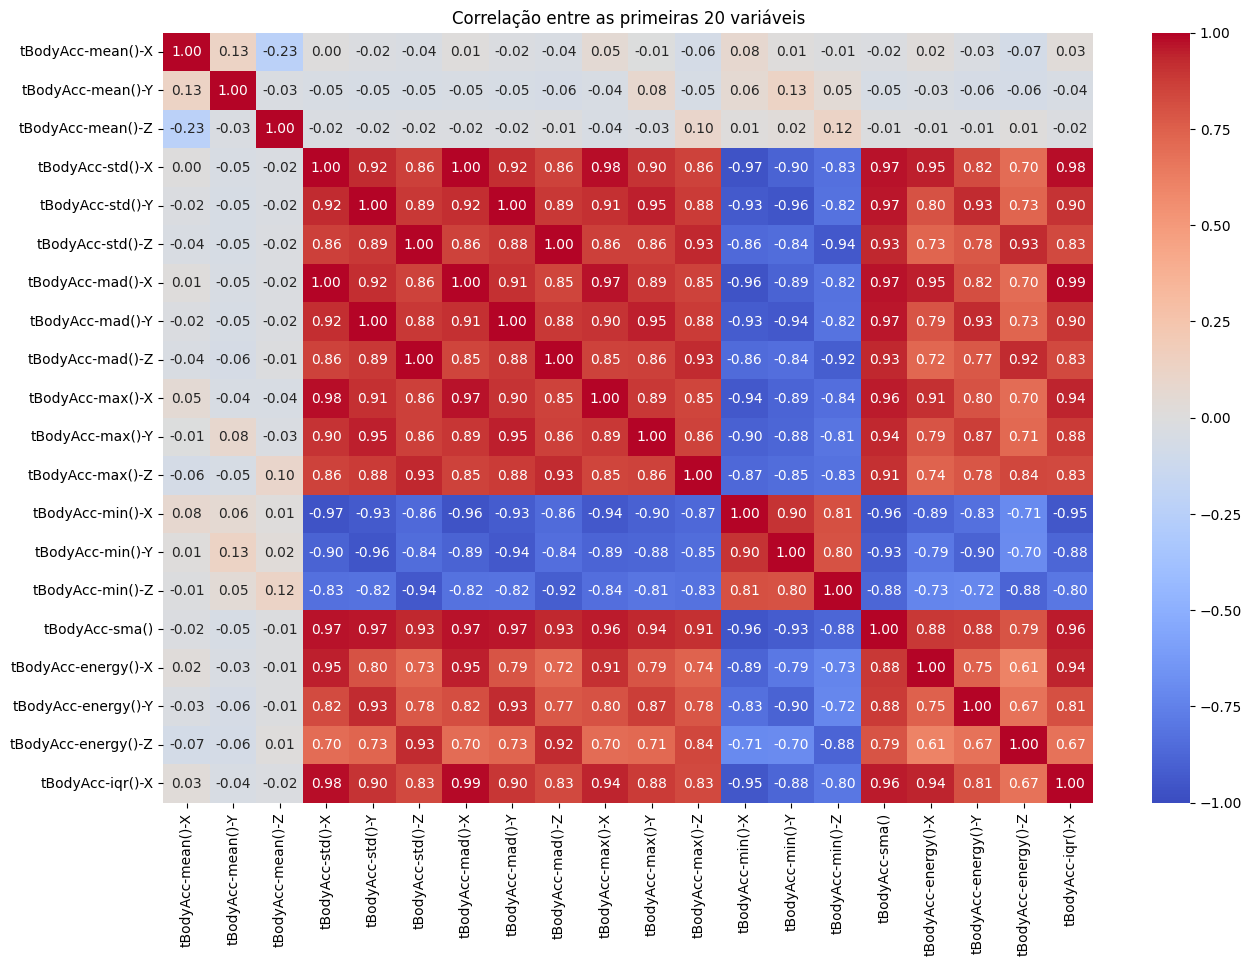

In [ ]:
# Correlação entre as primeiras 20 variáveis para análise
correlation_matrix = X.iloc[:, :20].corr()
correlation_df = correlation_matrix.reset_index()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlação entre as primeiras 20 variáveis')
plt.show()

In [57]:
# seleção das variáveis altamente correlacionadas (acima de 0.9)
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.9]
high_corr_pairs[20:]

,,0
tBodyAcc-mad()-X,tBodyAcc-std()-X,0.998662
tBodyAcc-std()-X,tBodyAcc-mad()-X,0.998662
tBodyAcc-mad()-Y,tBodyAcc-std()-Y,0.997510
tBodyAcc-std()-Y,tBodyAcc-mad()-Y,0.997510
tBodyAcc-mad()-Z,tBodyAcc-std()-Z,0.997360
...,...,...
tBodyAcc-sma(),tBodyAcc-max()-Z,0.910813
tBodyAcc-max()-X,tBodyAcc-mad()-Y,0.904283
tBodyAcc-mad()-Y,tBodyAcc-max()-X,0.904283
tBodyAcc-std()-Y,tBodyAcc-iqr()-X,0.903326


### Examinando a distribuição das variáveis

In [55]:
sample_X = X.iloc[:, :10]  # Seleciona as 10 primeiras variáveis para exemplo

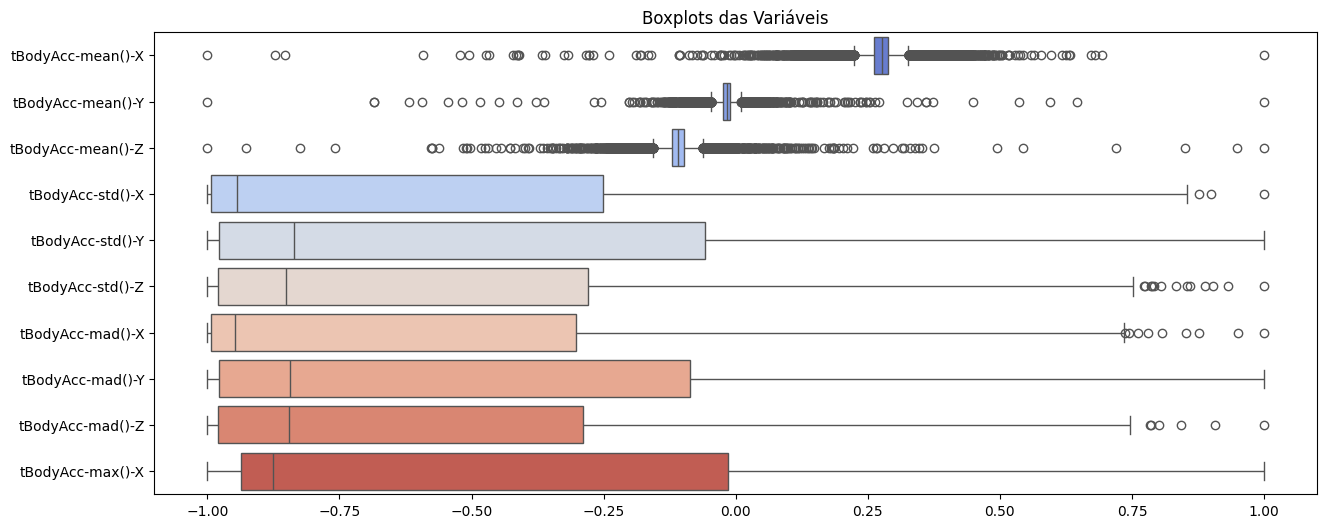

In [56]:
# Para identificar outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=sample_X, orient='h', palette='coolwarm')
plt.title('Boxplots das Variáveis')
plt.show()

### Dendorgrama



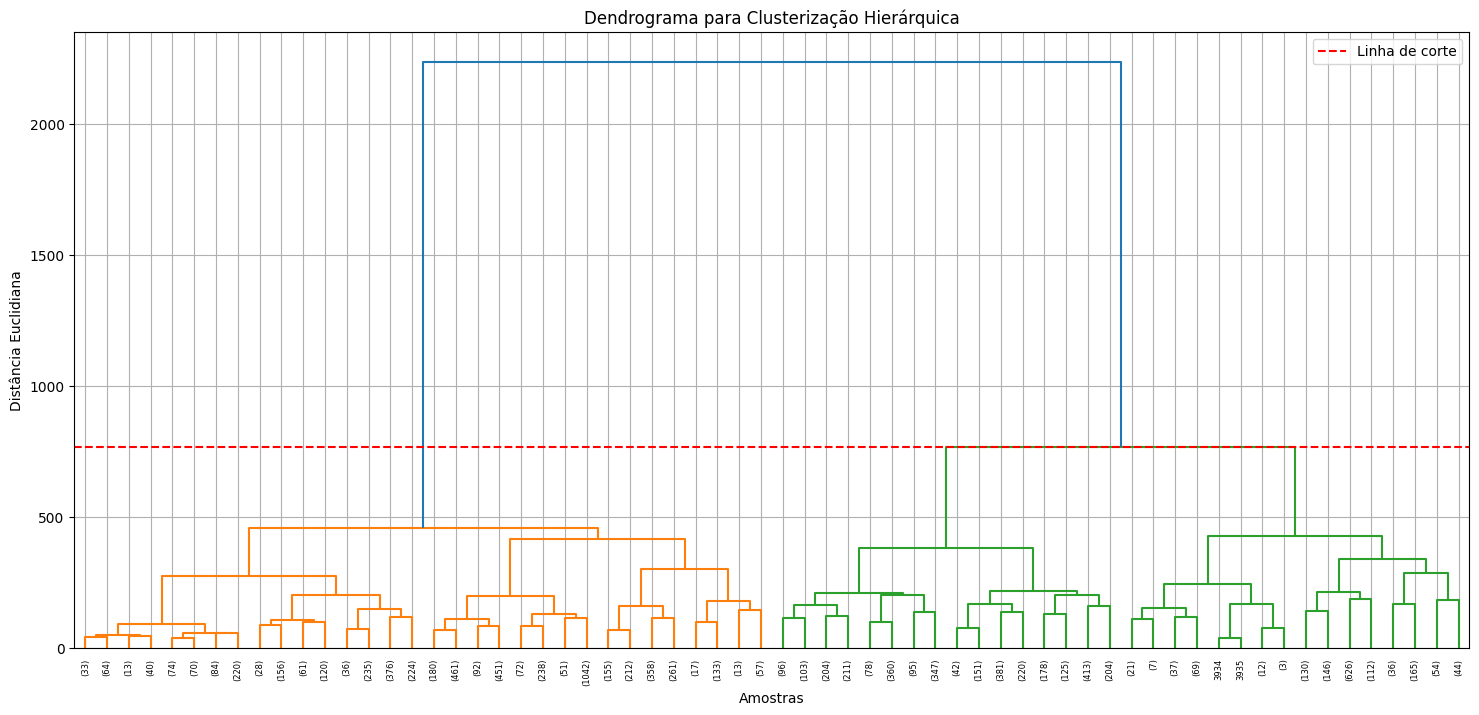

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linkage_matrix = linkage(X_scaled, method='ward')
distances = linkage_matrix[:, 2]
sorted_distances = np.sort(distances)
differences = np.diff(sorted_distances)
max_diff_index = np.argmax(differences)
plt.figure(figsize=(18, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.axhline(y=sorted_distances[max_diff_index], color='r', linestyle='--', label='Linha de corte')
plt.title('Dendrograma para Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
print(f"Maior salto em distância entre os clusters: {differences[max_diff_index]}")
print(f"Distância ideal para corte: {sorted_distances[max_diff_index]}")
cut_distance = 768.66
clusters = fcluster(linkage_matrix, cut_distance, criterion='distance')
num_clusters = len(set(clusters))
print(f"Número de clusters sugeridos: {num_clusters}")


Maior salto em distância entre os clusters: 1467.8937398800451
Distância ideal para corte: 768.6600669928569
Número de clusters sugeridos: 3


# Pré-processamento dos Dados

### Normalização

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA

In [122]:
pca = PCA(n_components=0.95)
X_scaled_pca = pca.fit_transform(X_scaled)

In [67]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228]


In [127]:
pca = PCA(n_components=3)
X_scaled_pca = pca.fit_transform(X_scaled)

In [128]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.50738221 0.06239186 0.02692564]


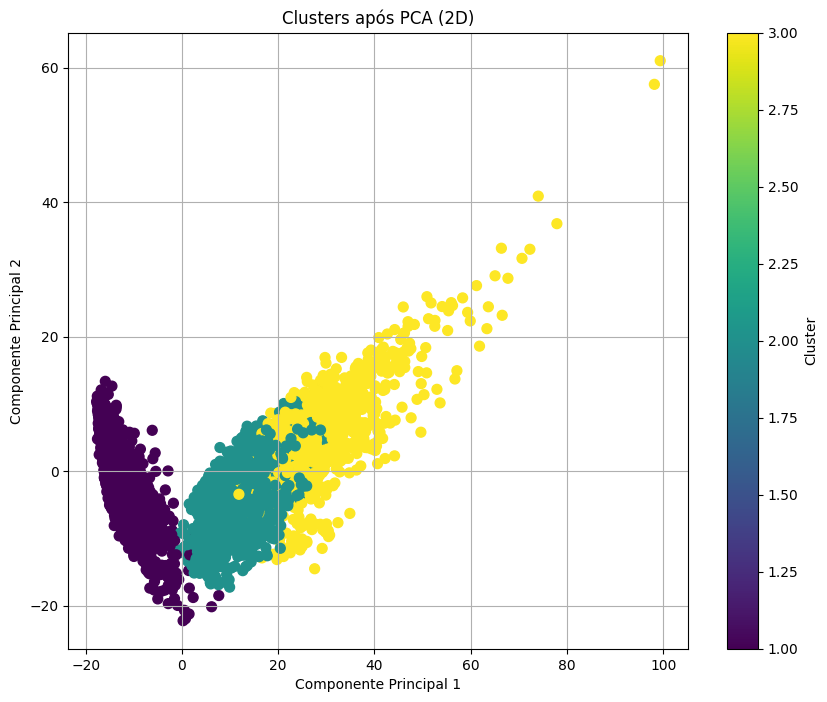

In [63]:
X_scaled_pca_df = pd.DataFrame(X_scaled_pca[:, :2], columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled_pca_df['PC1'], X_scaled_pca_df['PC2'], c=clusters, cmap='viridis', s=50)
plt.title('Clusters após PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

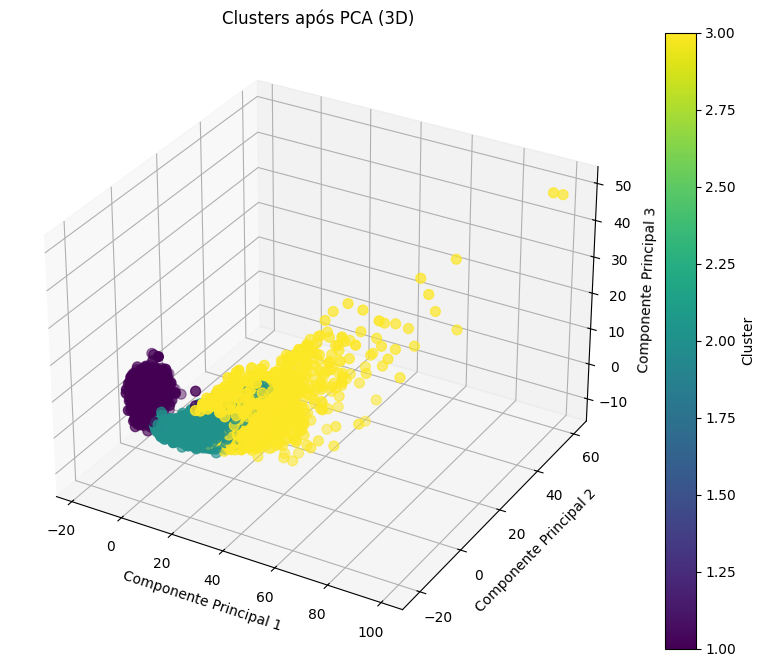

In [65]:
# Criando DataFrame com os 3 componentes principais
X_scaled_pca_df = pd.DataFrame(X_scaled_pca, columns=['PC1', 'PC2', 'PC3'])

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Criando o gráfico de dispersão 3D e passando a variável 'clusters' para as cores
scatter = ax.scatter(X_scaled_pca_df['PC1'], X_scaled_pca_df['PC2'], X_scaled_pca_df['PC3'], c=clusters, cmap='viridis', s=50)

# Definindo os rótulos dos eixos
ax.set_title('Clusters após PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Adicionando a barra de cores
plt.colorbar(scatter, label='Cluster')

# Exibindo o gráfico
plt.show()

### t-SNE

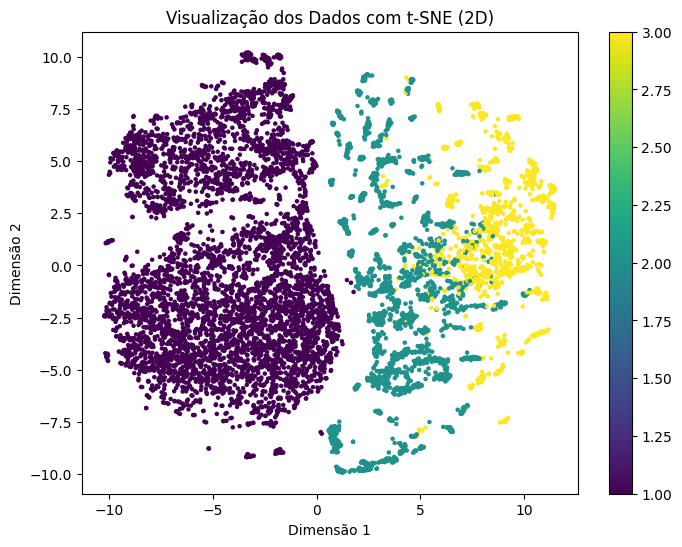

In [71]:
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Visualização dos Dados com t-SNE (2D)')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar()
plt.show()

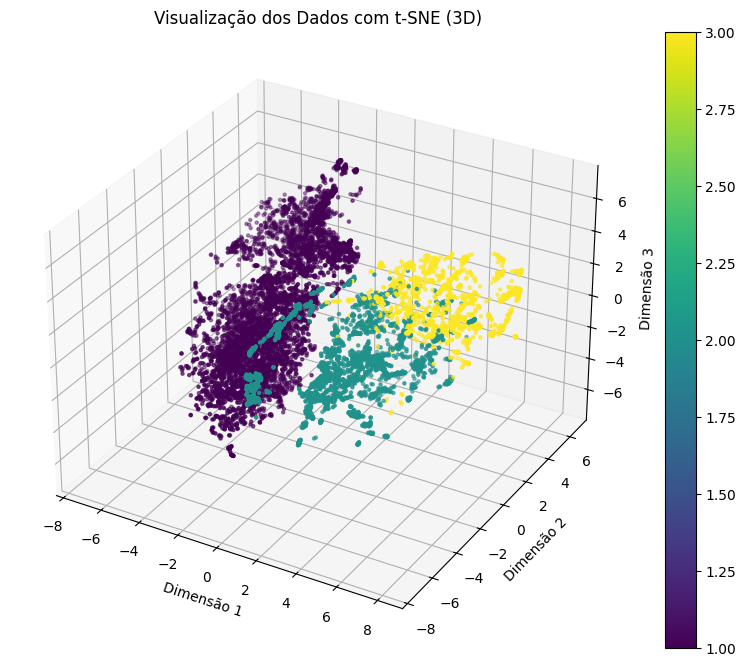

In [72]:
tsne = TSNE(n_components=3, perplexity=30, max_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotando os dados reduzidos em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=clusters, cmap='viridis', s=5)

ax.set_title('Visualização dos Dados com t-SNE (3D)')
ax.set_xlabel('Dimensão 1')
ax.set_ylabel('Dimensão 2')
ax.set_zlabel('Dimensão 3')
fig.colorbar(scatter, ax=ax)
plt.show()

# Implementação do Algoritmo de K-means


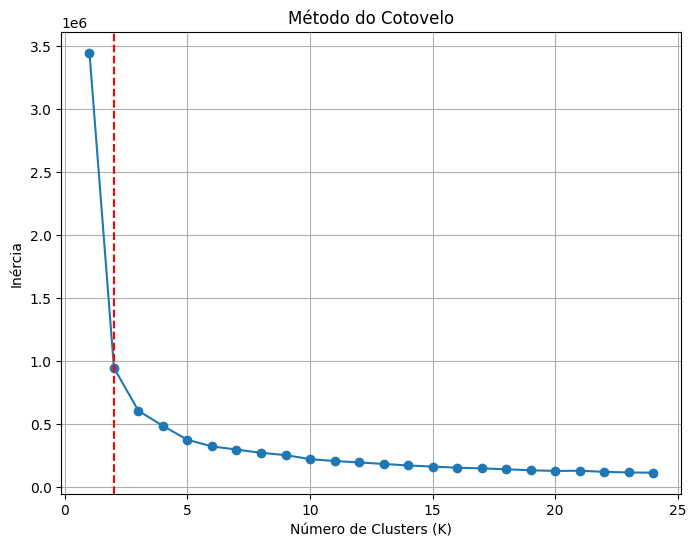

O melhor valor de K baseado no cotovelo é: 2


In [138]:
inertias = []
K = range(1, 25)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_pca)
    inertias.append(kmeans.inertia_)

# Encontrar o valor de K ideal baseado no cotovelo (inércia)
best_k_inertia = K[inertias.index(min(inertias[1:], key=lambda x: abs(x-inertias[0])))]  # Escolher o valor de K onde a inércia começa a diminuir lentamente

# Plotar o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, marker='o')
plt.axvline(x=best_k_inertia, color='r', linestyle='--')  # Linha vertical para indicar o melhor K
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.grid()
plt.show()

print(f"O melhor valor de K baseado no cotovelo é: {best_k_inertia}")

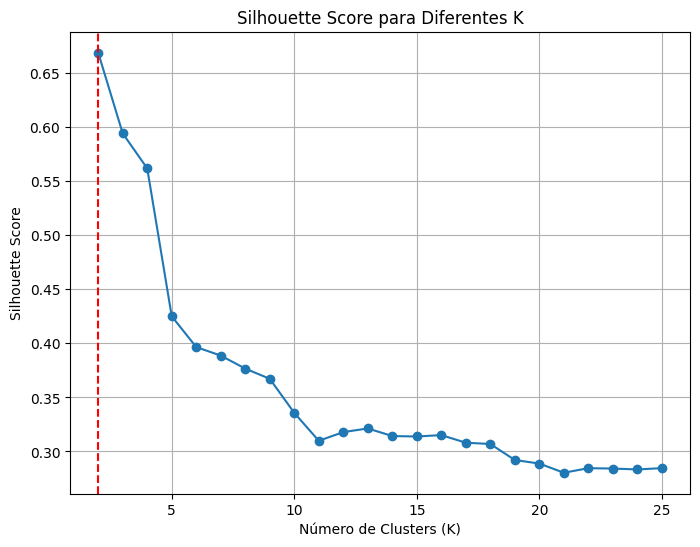

O melhor valor de K baseado no Silhouette Score é: 2


In [141]:
silhouette_scores = []
for k in range(2, 26):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled_pca)
    silhouette_scores.append(silhouette_score(X_scaled_pca, clusters))

# Encontrar o valor de K ideal baseado no Silhouette Score
best_k_silhouette = range(2, 26)[silhouette_scores.index(max(silhouette_scores))]

# Plotar o Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 26), silhouette_scores, marker='o')
plt.axvline(x=best_k_silhouette, color='r', linestyle='--')  # Linha vertical para indicar o melhor K
plt.title("Silhouette Score para Diferentes K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

print(f"O melhor valor de K baseado no Silhouette Score é: {best_k_silhouette}")

In [ ]:
for k in [2, 26]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=clusters, cmap='viridis', s=5)
    plt.title(f'Clusters K = {k} (PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.colorbar()
    plt.show()

In [ ]:
n_clusters = 25

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled_pca)

centroides = kmeans.cluster_centers_
inercia = kmeans.inertia_
print("Centroides:", centroides)
print("Inércia Final:", inercia)


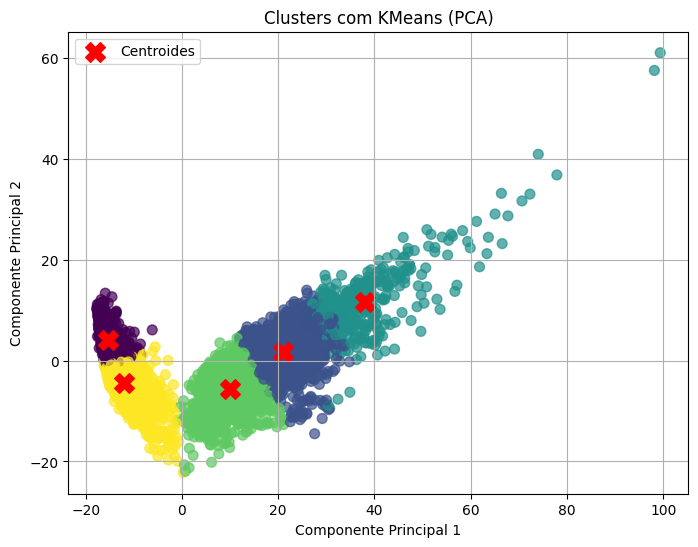

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters com KMeans (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid()
plt.show()

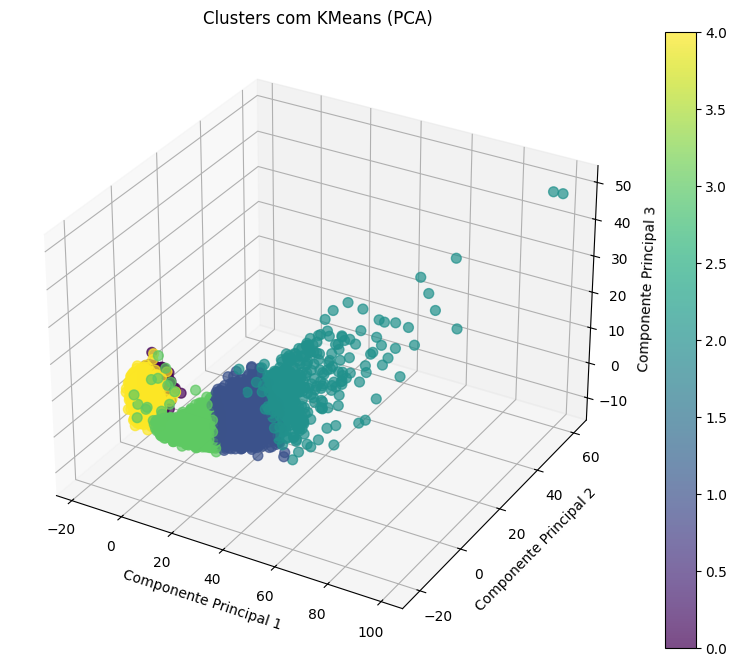

In [134]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], X_scaled_pca[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)
ax.set_title("Clusters com KMeans (PCA)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
plt.colorbar(scatter)
plt.show()

In [135]:
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(X_scaled_pca)
kmeans2 = KMeans(n_clusters=6, init='k-means++', random_state=43).fit(X_scaled_pca)

print("Consistência entre execuções:", adjusted_rand_score(kmeans1.labels_, kmeans2.labels_))

Consistência entre execuções: 0.7140260343488453


# Otimização, Ajustes e Avaliações

In [109]:
kmeans = KMeans(
    n_clusters=2,           # Ajuste para o número ideal de clusters (usando método do cotovelo/silhouette)
    init='k-means++',       # Inicialização eficaz
    n_init=10,              # Número de inicializações para garantir estabilidade
    max_iter=300,           # Número máximo de iterações
    random_state=42         # Reprodutibilidade
)

# Ajustar o modelo aos dados
clusters = kmeans.fit_predict(X_scaled_pca)

# Centroides e inércia
centroides = kmeans.cluster_centers_
inercia = kmeans.inertia_
print("Inércia Final:", inercia)

Inércia Final: 947360.6937678017


In [110]:
# Rodar múltiplas execuções do K-means
clusterings = []
for i in range(5):  # Ajuste o número de repetições
    kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=i)
    clusters = kmeans.fit_predict(X_scaled_pca)
    clusterings.append(clusters)

# Comparar atribuições entre execuções
import numpy as np
from sklearn.metrics import adjusted_rand_score

# Calcular estabilidade entre as execuções
for i in range(len(clusterings) - 1):
    score = adjusted_rand_score(clusterings[i], clusterings[i + 1])
    print(f"Estabilidade entre execução {i+1} e {i+2}: {score}")


Estabilidade entre execução 1 e 2: 1.0
Estabilidade entre execução 2 e 3: 1.0
Estabilidade entre execução 3 e 4: 1.0
Estabilidade entre execução 4 e 5: 1.0


In [111]:
silhouette_avg = silhouette_score(X_scaled_pca, clusters)
print("Silhouette Score Médio:", silhouette_avg)

Silhouette Score Médio: 0.669100354084374


# Testes

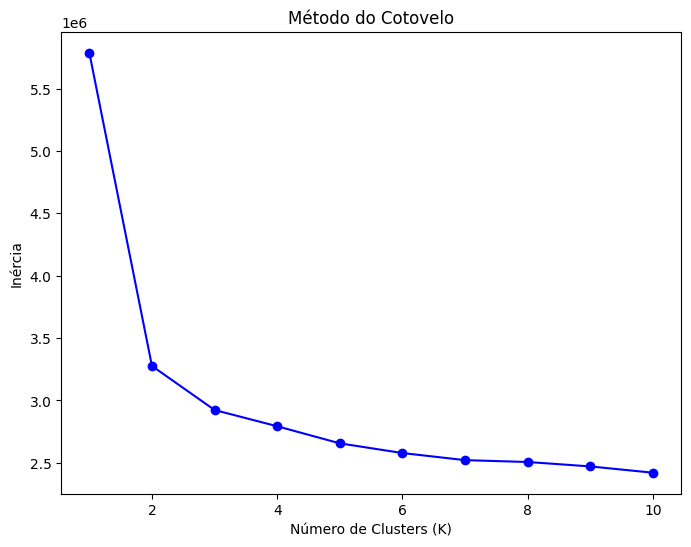

In [ ]:
# Testar diferentes valores de K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

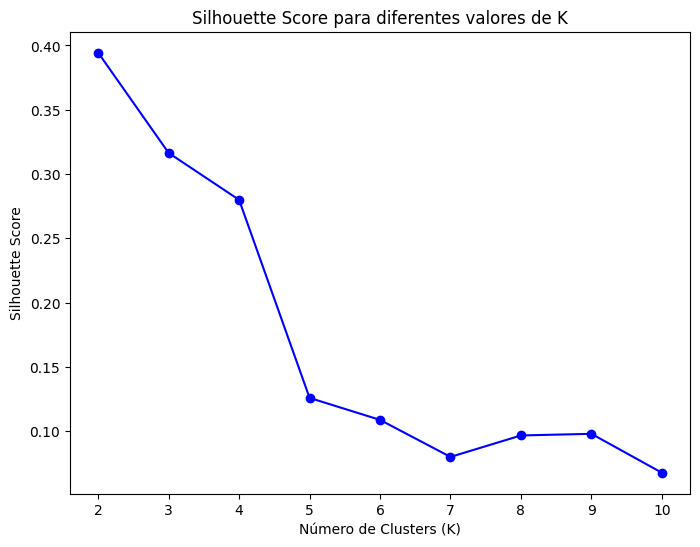

In [ ]:
silhouette_scores = []
for k in K_range[1:]:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K_range[1:], silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de K')
plt.show()

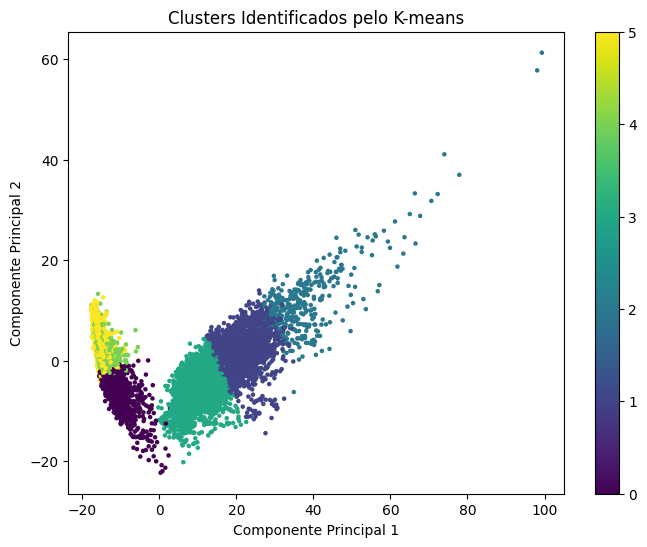

In [ ]:
# Selecionando o melhor K (exemplo: 6 baseado no gráfico anterior)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualizando os clusters em 2D após PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Clusters Identificados pelo K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

In [ ]:
# Avaliação final dos clusters
final_silhouette_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score Final: {final_silhouette_score:.2f}")

Silhouette Score Final: 0.11


In [ ]:
# Média das features por cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features[1])
print(cluster_centers)

ValueError: Shape of passed values is (6, 562), indices imply (6, 561)